In [ ]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표
- 머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기
  - optimization(최적화): 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정
  - generalization(일반화) : 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지
- 훈련 데이터에 대해 너무 최적화시키다 보면 일반화가 되지 않아 성능이 좋지 않음.

**머신 러닝 모델을 학습하는 과정**  
1. 데이터에 맞는 모델을 설계
2. 모델이 과적합이 될 수 있도록 하이퍼 파라미터를 조정
3. 성능 평가 시 좋은 성능을 위해 하이퍼 파라미터 조정
4. 최적의 성능을 내는 지점을 찾아서 다시 학습
5. 테스트 데이터를 이용해 테스트

### 과소적합과 과대적합
- underfitting
  - 훈련 데이터의 손실이 낮아질수록 테스트 데이터의 손실도 낮아짐
  - 네트워크가 훈련 데이터에 있는 모든 관련 패턴을 학습하지 못함
  - 아직 더 훈련을 해줘야 해
- overfitting
  - 훈련 데이터의 손실은 낮지만, 테스트 데이터의 손실을 올라가기 시작함
  - 훈련 데이터에만 특화된 패턴을 학습하기 시작했다
  - 새로운 데이터와 관련성이 적고 잘못된 판단을 하게 만듦
  - 특히, 언제 주로 일어날 수 있을까?
    - 잡음 섞인 훈련 데이터
    - 불확실한 특성
    - 드문 특성과 가짜 상관관계

#### 잡음 섞인 훈련 데이터
- 잡음, 즉 이상치가 섞인 데이터가 많을 때
- 레이블이 잘못됐거나
- 이상한 훈련 샘플들이 섞였을 때

#### 불확실한 특성
- 각 데이터 클래스 하나에 매칭되는 특성이 아닌, 모호한 특성들이 있을 때
- 바나나가 익었는지 안 익었는지 같은 주관적인 특성
- 일기 예보 같이 모호한 경우

#### 드문 특성과 가짜 상관관계
- 별로 연관 없는 특성이 데이터에 상관 관계가 있을때
- cherimoya 는 과일인데 이게 어떤 훈련 데이터의 특성으로 있을때

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**
- 아예 랜덤한 데이터를 만들어서 학습해보자

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
train_images.shape, train_images_with_noise_channels.shape

((60000, 784), (60000, 1568))

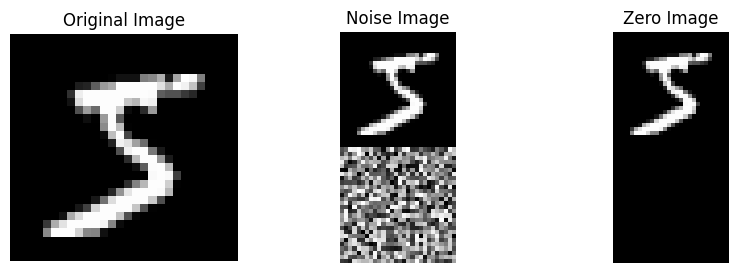

In [ ]:
original_image = train_images[0].reshape((28, 28))
noise_image = train_images_with_noise_channels[0].reshape((56, -1))
zero_image = train_images_with_zeros_channels[0].reshape((56, -1))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Noise Image")
plt.imshow(noise_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Zero Image")
plt.imshow(zero_image, cmap="gray")
plt.axis("off")

plt.show()

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6997 - loss: 1.0164 - val_accuracy: 0.9053 - val_loss: 0.3086
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9086 - loss: 0.2928 - val_accuracy: 0.9399 - val_loss: 0.2008
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9482 - loss: 0.1827 - val_accuracy: 0.9575 - val_loss: 0.1611
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1281 - val_accuracy: 0.9604 - val_loss: 0.1360
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0917 - val_accuracy: 0.9429 - val_loss: 0.1869
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.0729 - val_accuracy: 0.9673 - val_loss: 0.1181
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9919 - loss: 0.0505 - val_accuracy: 0.9688 - val_loss: 0.1238
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0360 - val_accuracy: 0.

**검증 정확도 비교 그래프 그리기**

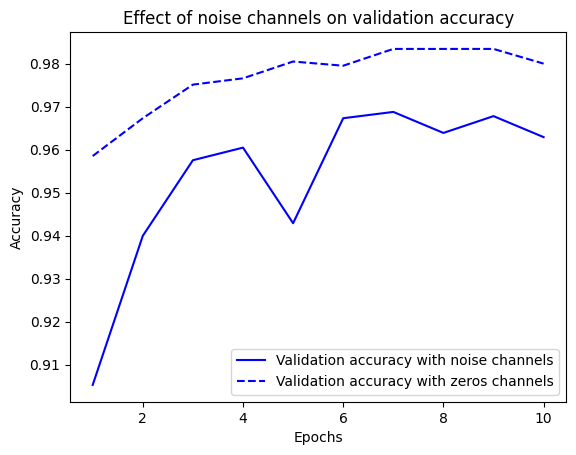

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**잡음 섞인 데이터 vs 제로 패딩 데이터**  
- 잡음이 섞인 데이터에서 훈련된 모델의 검증 정확도가 1퍼센트정도 낮음
- 모델이 잡음의 가짜 상관 관계를 학습했기 때문
- 잡음을 더 많이 섞을수록 정확도는 더 감소

**그럼 특성이 연관 있는지 어케 알지**  
- Feature selection을 수행
- 가용한 각 특성에 대해 어떤 유용성 점수를 계산
- 특성과 레이블 사이의 mutual information처럼 작업에 특성이 얼마나 유익한지 측정

### 딥러닝에서 일반화의 본질
- 딥러닝 모델은 사실 표현 능력이 충분하다면, 모델이 충분히 복잡하다면, 즉, 유닛사이즈가 크고 모델이 깊다면, 어떤 것에도 맞추도록 훈련 가능

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0991 - loss: inf - val_accuracy: 0.1047 - val_loss: 2.2871
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1181 - loss: inf - val_accuracy: 0.1027 - val_loss: 2.3008
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1275 - loss: inf - val_accuracy: 0.1009 - val_loss: 2.3105
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1412 - loss: inf - val_accuracy: 0.1050 - val_loss: 2.3223
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1502 - loss: inf - val_accuracy: 0.1020 - val_loss: 2.3340
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1663 - loss: inf - val_accuracy: 0.1054 - val_loss: 2.3438
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1775 - loss: inf - val_accuracy: 0.1046 - val_loss: 2.3633
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1979 - loss: inf - val_accuracy: 0.1059 - val_loss:

레이블을 랜덤하게 섞어서 잘못된 데이터일텐데도 모델은 학습함.
- 걍 데이터를 외워버리는거임!!

#### 매니폴드 가설
- MNIST 28X28, 255 -> 가능한 전체 입력 값: 784 ** 256
- 하지만 손글씨라고 인식될 수 있는 부분, 즉 손글씨의 부분 공간은 아주 작아
- 게다가 손글씨가 있는 공간, 즉 매니폴드는 랜덤하게 뿌려진게 아니라 구조적이고 연속적임
- 각 데이터들이 연결되어 있어서, 3에서 8로 가는 그 사이 조차도 숫자로 인식될 가능성이 있어.
- 물론 모호하게 보이긴 하겠지.
- -> 손글씨 숫자가 가능한 모든 28X28 unit8 배열로 이루어진 공간 안에서 **매니폴드**를 형성한다

**매니폴드**  
- 국부적으로는 선형(유클리드) 공간과 비슷하게 보이는 부모 공간의 저차원 부분 공간
- 평면상의 매끄러운 한 곡선은 2D 공간 안에 있는 1D 매니폴드
- 3D 공간상의 매끄러운 한 표면은 2D 매니폴드

**매니폴드 가설**  
- 실제 세상의 모든 데이터가 해당 데이터가 인코딩된 고차원 공간 안에 있는 저차원 매니폴드에 놓여 있다고 가정
- -> 이게 딥러닝이 작동하는 이유!
- 머신 러닝 모델은 가능한 입력 공간 안에서 비교적 간단하고, 저차원이며, 매우 구조적인 부분 공간(latent manifold)만 학습하면 됨
- 이런 매니폴드 중 하나 안에서 두 입력 사이를 interpolation하는 것이 항상 가능.
  - -> 즉, 연속적인 경로를 따라 한 입력에서 다른 입력으로 변형할 때 모든 포인트가 이 매니폴드에 속함
- 샘플 사이를 보간하는 능력은 딥러닝에서 일반화를 이해하는 열쇠!

#### 일반화의 원천인 보간 (interpolation)
- 다루는 데이터 포인트를 보간할 수 있다면, 이전에 본 적 없는 포인트도 역시 해당 매니폴드 내에서 가까이 있는 다른 포인트랑 연결하여 이해 가능하겠지?
- 공간 안의 샘플만 사용해서 공간 전체를 이해 가능
  - 왜냐면 보간을 사용해서 빈 곳을 채울 수 있으니깐.
  - 이전에 본 것과 매우 가까운 것을 이해하는데 도움을 주는데 그 뿐이야. : **지역 일반화**
  - 보지 않은 걸 예측은 가능한데 전체 공간에 대해 극소 영역일뿐..
- 숫자의 잠재 매니폴드에서 모든 포인트는 유효한 숫자가 됨.
  - 일반적으로 두 숫자의 픽셀들을 평균해서 구하면 유효가 숫자가 되지 않지.


#### 딥러닝이 작동하는 이유
- 딥러닝 모델 : 잠재 매니폴드를 풀기 위한 도구
  - 입력 데이터는 입력 공간 안에서 고도로 구조적인 저차원의 매니폴드를 형성
  - 최적 적합 : 모델이 데이터의 매니폴드를 대략적으로 근사하는 중간 지점
- 모델이 훈련 입력 사이를 보간하여 이전에 본 적 없는 입력을 이해 가능
- 딥러닝 모델이 왜 잠재 매니폴드를 학습하는 데 잘 맞을까?
  - 딥러닝 모델은 **충분한 표현 능력**을 가질 수 있음. (충분히 복잡하게 설계 가능)
  - 딥러닝 모델은 입력에서부터 출력으로 **매끄럽고 연속적인** 매핑을 구현
  - 훈련 데이터에 있는 **정보의 형태를 반영하는 식으로 계층적이고 모듈 방식으로 구조화**됨, 자연적인 데이터가 구성되는 방식을 반영함

> 구니깐 이 말임.  
  MNIST 데이터로 예를 들면, 입력이 가능한 (28X28)^256 차원의 공간이 있겠지?  
  근데 모든 경우의 수가 전부 다 손글씨로 인식이 되는 건 아니잖아?  
  그 중, 아주 극소의 부분만 손글씨로 인식이 될 수 있어 --> 이게 매니폴드야  
  **매니폴드는 데이터가 존재하는 공간**인거..  
  딥러닝 모델은 이 공간을 자기만의 방식으로 찾는거, 그리고 얘가 찾은 공간은 데이터가 존재하는 공간이기 때문에 연속적인 데이터가 모두 손글씨로 인식될 가능성이 있어  
  입력 데이터가 실재하는 세계를 모두 반영하지 못 하지만, 딥러닝 모델이 제대로 학습되어 매니폴드에 근사한 공간을 찾아낸다면, 데이터 사이의 학습되지 않은 부분도 예측할 수 있다!! 보간!!!

#### 가장 중요한 훈련 데이터
- 딥러닝의 일반화 능력은 데이터의 자연적인 구조로 인한 결과
- 데이터가 보간할 수 있는 매니폴드를 형성하는 경우에만 일반화 가능
- 특성이 유익하고 잡음이 적음 --> 입력 공간이 더 간단하고 구조적 --> 일반화 더 잘 됨
  - 따라서, data curation & feature engineering 은 일반화에 필수
- 보간을 잘 수행하려면 조밀하게 샘플링해야 함 특히 결정 경계 근처에서.. --> 더 많은 데이터

**데이터가 적을 때**  
- 모델이 저장할 수 있는 정보량을 조정 : 네트워크 단순화
- 모델 곡선의 매끄러운 정도에 제약을 추가
- 네트워크가 적은 개수의 패턴만 기억하거나 매우 규칙적인 패턴만 기억 가능 --> 그럼 최적화 과정에서 일반화 가능성이 높은 가장 눈에 띄는 패턴에만 초점을 맞추도록 하겠지?



## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트
- 하이퍼 파라미터 튜닝을 위해 모델의 성능을 평가하여 튜닝을 수행 -> 이때 검증 세트를 사용
- 튜닝을 계속 진행하다 보면 검증 세트로 훈련을 직접적으로 진행하지 않아도 모델에 반영되겠지? -> 검증 세트에 과대적합 될 가능성 있음
- information leak : 검증 데이터에 관한 정보가 모델로 새는 것
- 그럼 데이터가 적을 때는 어케 하지?
  - hold-out validation
  - K-fold cross-validation
  - iterated K-fold cross-validation using shuffling


#### 단순 홀드아웃 검증 (hold-out validation)

In [ ]:
num_validation_samples = 10000
# 데이터를 다시 섞어서 성능 평가 했을 때 차이가 많이 나면 데이터 개수 문제임
np.random.shuffle(data)

# validation set & train set
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]

# model training, tunning, validating...
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)

...

# 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 모든 데이터를 사용하여 모델을 다시 훈련시킴
model = get_model()
model.fit(np.concatenate([training_data, validation_data]), ...)

# 테스트 데이터로 성능 평가
test_score = model.evaluate(test_data, ...)


- 단점
  - 데이터가 너무 너무 적을 때는 검증 세트와 테스트 세트의 샘플이 너무 적어서 주어진 전체 데이터를 통계적으로 대표하지 못 할 수도 있음
  - 데이터를 다시 섞어서 성능 평가 했을 때 차이가 많이 나면 이 문제임..

#### K-겹 교차 검증
- 데이터를 동일한 크기를 가진 K개의 분할로 나눔
- K-1개의 분할로 모델을 훈련
- 분할 i에서 모델 평가
- 모델의 성능이 데이터 분할에 따라 편차가 클 때 유용

In [ ]:
# 폴드 갯수
k = 3
num_validation_samples = len(data) // k
np.random.shuffle(data)

validation_scores = []

for fold in range(k):
  # validation set & train set
  validation_data = data[num_validation_samples * fold : num_validation_samples (fold + 1)]
  training_data = np.concatenate(
      data[:num_validation_samples * fold],
      data[num_validation_samples * (fold + 1):])

  # model training, tunning, validating...
  model = get_model()
  model.fit(training_data, ...)
  validation_score = model.evaluate(validation_data, ...)
  validation_scores.append(validation_score)

# K개의 폴드들의 검증 점수를 평균내서 최종 스코어를 결정
validation_score = np.average(validation_scores)

# 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 모든 데이터를 사용하여 모델을 다시 훈련시킴
model = get_model()
model.fit(np.concatenate([training_data, validation_data]), ...)

# 테스트 데이터로 성능 평가
test_score = model.evaluate(test_data, ...)


#### 셔플링을 사용한 반복 K-겹 교차 검증
- K개의 분할로 나누기 전에 매번 데이터를 무작위로 섞는거
- P(반복 횟수) * K개의 모델을 훈련하고 평가
- 비용이 매우 많이 듦

### 상식 수준의 기준점을 넘기
- 우리는 모델이 매니폴드를 어떻게 학습하는지 알 수 없음
- 검증 지표로만 알 수 있음..
- 따라서 간단한 기준점 같은걸 정해야 해

### 모델 평가에 대해 유념해야 할 점
- 모델 성능을 신뢰 있게 평가할 수 있는 방법을 찾아야 됨
- 평가 방식을 선택할 때 유의 사항
  - 대표성 있는 데이터: 주어진 데이터에 대한 대표성이 있어야 함
  - 시간의 방향: 시퀀스 데이터에서 데이터를 무작위로 섞어버리면 미래 정보가 누설될 수 있겠지?
  - 데이터 중복: 훈련 세트와 검증 세트가 중복되지 않아야 함

## 훈련 성능 향상하기 : 과대적합을 찾아보자!
- 최적 적합 모델을 얻으려면 먼저 과대적합 되어야 함
- 약간의 일반화 능력을 보이고 과대 적합 가능한 모델 찾기 -> 일반화 성능을 개선하자!
- 이 단계에서 해결해야 할 문제점
  - 시간이 지나도 훈련 손실이 줄어들지 않음 : 훈련이 안됨 -> **하이퍼파라미터 튜닝 (학습률, 배치 크기 등..)**
  - 기준점을 넘기가 힘듦 : 훈련은 잘 됐는데 의미 있는 일반화를 달성 못함 -> **구조 다시 생각.. 입력 데이터에 타겟 예측을 위한 정보 부족, 모델 종류가 문제에 부적합**
  - 훈련 손실, 검증 손실이 모두 줄어들고 기준점도 넘었는데 과대적합이 안됨 : 과소적합 상태 -> **모델 용량을 늘리자**


### 경사 하강법의 핵심 파라미터 튜닝하기
**핵심 파라미터**  
- 옵티마이저
- 모델 가중치의 초깃값 분포
- 학습률
- 배치 크기

**시도해 볼 방법들**  
- 학습률을 낮추거나 높인다.
  - 너무 높은 학습률: 최적적합을 크게 뛰어넘는 업데이트 발생 가능성
  - 너무 낮은 학습률: 훈련이 너무 느려
- 배치 크기 증가
  - 배치 샘플을 늘리면 유익하고 잡음이 적음(== 분산이 낮은) 그레디언트 생성

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4350 - loss: 2145.3970 - val_accuracy: 0.2776 - val_loss: 1.9209
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2225 - loss: 2.8738 - val_accuracy: 0.2349 - val_loss: 2.0703
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2219 - loss: 2.6681 - val_accuracy: 0.2142 - val_loss: 2.1544
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1947 - loss: 2.4161 - val_accuracy: 0.2027 - val_loss: 2.1675
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2007 - loss: 2.8449 - val_accuracy: 0.2047 - val_loss: 2.2010
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1883 - loss: 2.3891 - val_accuracy: 0.2097 - val_loss: 2.1647
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2013 - loss: 2.4673 - val_accuracy: 0.2507 - val_loss: 3.0327
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2061 - loss: 2.4112 - val_accuracy:

**같은 모델을 적절한 학습률로 훈련하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8298 - loss: 0.8843 - val_accuracy: 0.9552 - val_loss: 0.1566
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9645 - loss: 0.1237 - val_accuracy: 0.9656 - val_loss: 0.1285
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9742 - loss: 0.0884 - val_accuracy: 0.9679 - val_loss: 0.1579
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0709 - val_accuracy: 0.9694 - val_loss: 0.1468
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9826 - loss: 0.0643 - val_accuracy: 0.9693 - val_loss: 0.1773
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9847 - loss: 0.0625 - val_accuracy: 0.9704 - val_loss: 0.1721
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.0496 - val_accuracy: 0.9728 - val_loss: 0.1867
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0410 - val_accuracy: 0.

### 구조에 대해 더 나은 가정하기
훈련은 되는데 검증 지표가 전혀 나아지지 않음, 일반화가 되지 않음. 최악!  
  
**예상해 볼 이유들**  
- 입력 데이터에 타겟 예측을 위한 정보가 충분하지 않음
  - e.g. 레이블을 섞어놓은 mnist 데이터
- 모델 종류가 문제에 부적합
  - e.g. 이미지 분류 문제에 RNN 사용

### 모델 용량 늘리기
- 오키, 일반화 성능이 어느 정도 나오네? 과적합 시켜보자!

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7343 - loss: 1.0390 - val_accuracy: 0.9016 - val_loss: 0.3603
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9003 - loss: 0.3664 - val_accuracy: 0.9145 - val_loss: 0.3111
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9109 - loss: 0.3234 - val_accuracy: 0.9203 - val_loss: 0.2912
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9159 - loss: 0.3049 - val_accuracy: 0.9222 - val_loss: 0.2849
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9161 - loss: 0.3013 - val_accuracy: 0.9233 - val_loss: 0.2797
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9202 - loss: 0.2804 - val_accuracy: 0.9246 - val_loss: 0.2747
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9220 - loss: 0.2816 - val_accuracy: 0.9240 - val_loss: 0.2719
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9233 - loss: 0.2780 - val_accuracy: 0.

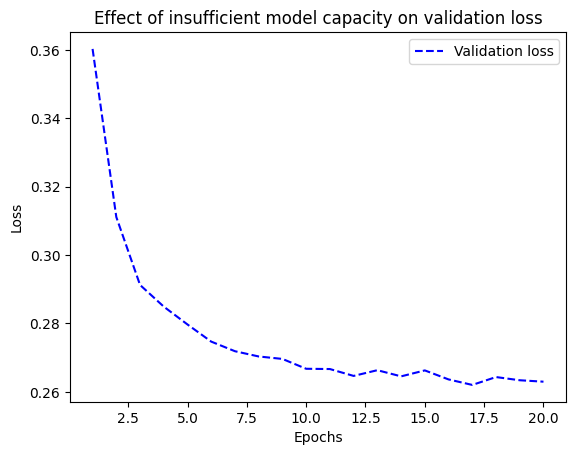

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**딥러닝 모델을 항상 과대 적합이 가능!!!**  
- 과대 적합을 못 하면 모델 표현 능력(representational power)이 부족한 것
- -> 용량이 더 큰 모델이 필요! (더 많은 정보를 저장할 수 있어야 해)
  - 층을 추가
  - 더 많은 가중치를 가지도록 층 크기를 늘려
  - 구조에 대해 더 나은 가정을 하여 현재 문제에 더 적합한 종류의 층을 사용

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8330 - loss: 0.6083 - val_accuracy: 0.9452 - val_loss: 0.1879
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9471 - loss: 0.1822 - val_accuracy: 0.9627 - val_loss: 0.1283
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9628 - loss: 0.1205 - val_accuracy: 0.9678 - val_loss: 0.1128
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0895 - val_accuracy: 0.9684 - val_loss: 0.1071
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 0.0699 - val_accuracy: 0.9723 - val_loss: 0.0963
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9822 - loss: 0.0561 - val_accuracy: 0.9743 - val_loss: 0.0948
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0443 - val_accuracy: 0.9700 - val_loss: 0.1014
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0405 - val_accuracy: 0.

## 일반화 성능 향상하기

### 데이터셋 큐레이션
- 적절한 데이터셋으로 작업하고 있는지 확인
  - 데이터가 충분한지 확인 : 조밀한 샘플링, 데이터가 많을수록 좋은 모델..
  - 레이블 할당 에러를 최소화 : 입력을 시각화하여 이상치 확인, 레이블 교정
  - 데이터를 정제하고 누락된 값을 처리
  - 특성 선택을 수행

### 특성 공학
- 특성을 더 간단한 방식으로 표현하여 문제를 쉽게 만듦
- 잠재 매니폴드를 더 매끄럽고, 간단하고, 구조적으로 만드는거!

**좋은 특성이란?**  
- 적은 자원을 사용하여 문제 풀기 가능
- 적은 데이터로 문제 풀기 가능

### 조기 종료 사용하기
- 딥러닝에서는 항상 지나치게 파라미터가 많은 모델을 사용함
  - 잠재 매니폴드를 학습하기 위해 필요한 최소한 것보다 훨씬 많은 자유도를 가지게 함
  - 그래서 모델을 끝까지 훈련하면 일반화 성능이 아주 떨어질 것
  - 그 전에 최고 성능 낼 때 멈춰야지! -> early stopping

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5938 - accuracy: 0.7188 - val_loss: 0.4775 - val_accuracy: 0.8223
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3855 - accuracy: 0.8823 - val_loss: 0.3445 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2793 - accuracy: 0.9102 - val_loss: 0.2954 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2231 - accuracy: 0.9224 - val_loss: 0.3018 - val_accuracy: 0.8760
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1873 - accuracy: 0.9380 - val_loss: 0.2815 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1600 - accuracy: 0.9487 - val_loss: 0.2976 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1401 - accuracy: 0.9546 - val_loss: 0.2854 - val_accuracy: 0.8882
Epoch 8/20
30

**작은 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6519 - accuracy: 0.5933 - val_loss: 0.6040 - val_accuracy: 0.7178
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5728 - accuracy: 0.7461 - val_loss: 0.5542 - val_accuracy: 0.7925
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5244 - accuracy: 0.8154 - val_loss: 0.5210 - val_accuracy: 0.7886
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4868 - accuracy: 0.8511 - val_loss: 0.4944 - val_accuracy: 0.8511
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4570 - accuracy: 0.8818 - val_loss: 0.4780 - val_accuracy: 0.8369
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4326 - accuracy: 0.9004 - val_loss: 0.4685 - val_accuracy: 0.8369
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4116 - accuracy: 0.9146 - val_loss: 0.4497 - val_accuracy: 0.8799
Epoch 8/20
30

**큰 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5781 - accuracy: 0.7070 - val_loss: 0.3630 - val_accuracy: 0.8560
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3296 - accuracy: 0.8623 - val_loss: 0.3074 - val_accuracy: 0.8687
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2310 - accuracy: 0.9097 - val_loss: 0.3416 - val_accuracy: 0.8569
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1981 - accuracy: 0.9180 - val_loss: 0.3533 - val_accuracy: 0.8462
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1459 - accuracy: 0.9448 - val_loss: 0.3137 - val_accuracy: 0.8672
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0991 - accuracy: 0.9658 - val_loss: 0.3301 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0792 - accuracy: 0.9736 - val_loss: 0.4399 - val_accuracy: 0.8687
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6064 - accuracy: 0.7861 - val_loss: 0.4951 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4094 - accuracy: 0.8936 - val_loss: 0.4023 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3438 - accuracy: 0.9092 - val_loss: 0.3677 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3059 - accuracy: 0.9248 - val_loss: 0.3633 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2842 - accuracy: 0.9292 - val_loss: 0.3992 - val_accuracy: 0.8672
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2688 - accuracy: 0.9375 - val_loss: 0.3679 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2593 - accuracy: 0.9404 - val_loss: 0.3628 - val_accuracy: 0.8872
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6196 - accuracy: 0.6484 - val_loss: 0.4907 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4905 - accuracy: 0.7754 - val_loss: 0.3745 - val_accuracy: 0.8735
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4167 - accuracy: 0.8252 - val_loss: 0.3311 - val_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3608 - accuracy: 0.8628 - val_loss: 0.2959 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3181 - accuracy: 0.8843 - val_loss: 0.2827 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2900 - accuracy: 0.8975 - val_loss: 0.2896 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2563 - accuracy: 0.9111 - val_loss: 0.2737 - val_accuracy: 0.8926
Epoch 8/20
30

## 요약